# 概要
以下のWebサイトで公開されているコードを通して、VGG16の動作を確認します。なお、最初のセルの実行時に500MB程の学習済みの結合係数がダウンロードされます。もしこのダウンロードに失敗した場合、.kerasフォルダ内のファイルを削除してください。また、tensorflow-gpuをバックエンドで利用している場合、大抵はメモリ不足のエラーが出るはずです。その場合はCPU版のtensorflowを使う仮想環境を作成し、それをjupyterのKernelに指定してください。

* [外部リンク：KerasでVGG16を使う](http://aidiary.hatenablog.com/entry/20170104/1483535144)
* [外部リンク：仮想環境をjupyterのカーネルとして使う](https://qiita.com/tomochiii/items/8b937f15c79a0c3eae0e)

In [1]:
# 学習済みのVGG16をロード
# ネット上の任意の画像を識別させるには、include_topはTrueとする　（Falseだと最終層がなくなって、特徴生成器になる）
from keras.applications.vgg16 import VGG16

model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

c:\users\morishita\anaconda3\envs\tensorflow-cpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(model)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
# URLの指定で画像を読み込む関数を定義
from PIL import Image
import requests


def read_img_url(url):
    im = Image.open(requests.get(url, stream=True).raw)
    return im

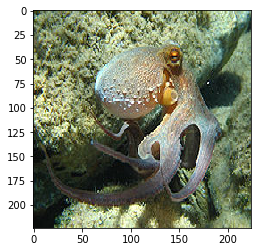

(1, 224, 224, 3)
('n02321529', 'sea_cucumber', 0.24242976)
('n01984695', 'spiny_lobster', 0.1818968)
('n01986214', 'hermit_crab', 0.09695678)
('n01950731', 'sea_slug', 0.06435148)
('n02526121', 'eel', 0.05828894)


In [7]:
# ImageNetで学習済みのVGG16モデルを使って入力画像のクラスを予測する

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline


# 学習済みのVGG16をロード
# 構造とともに学習済みの重みも読み込まれる
model = VGG16(weights='imagenet')
# model.summary()

# 画像ファイルを読み込む　（ここでは、ネット上の画像をURLで指定している）
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Octopus_vulgaris2.jpg/250px-Octopus_vulgaris2.jpg"  # タコの画像
target_img = read_img_url(url)
#target_img = image.load_img("file_name")  # for from a local file
img = target_img.resize((224, 224))        # サイズはVGG16のデフォルトである224x224にリサイズする
plt.imshow(img)                            # 読み込んだ画像を表示
plt.show()

# 読み込んだPIL形式の画像をarrayに変換
x = image.img_to_array(img)

# 3次元テンソル（rows, cols, channels) を4次元テンソル (samples, rows, cols, channels) に変換
# 入力画像は1枚なのでsamples=1でよい
x = np.expand_dims(x, axis=0)
print(x.shape)                                 # 念のためにshapeを表示させる

# Top-5のクラスを予測する
# VGG16の1000クラスはdecode_predictions()で文字列に変換される
preds = model.predict(preprocess_input(x))      # 予測の実行
results = decode_predictions(preds, top=5)[0]   # 画像1枚分の表示なので、配列要素の0を指定して取り出す

# 結果の表示（可能性の高い者から順に表示される）
for result in results:
    print(result)